In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as sk_linear_models
import sklearn.metrics as sk_metrics

%matplotlib inline

### Comparison of linear and logistic regression in classification problems.

In [6]:
def dashboard_data(X, y, modeled_logistic, modeled_linear):
    """ printing Confusion_matrix Accuracy Recall Precision Error
    in a nice table to compare logistic and linear predictions """

    logistic_cm = sk_metrics.confusion_matrix(y, modeled_logistic)
    linear_cm = sk_metrics.confusion_matrix(y, modeled_linear)

    print(f"Confusion matrix:\n{logistic_cm}\n{linear_cm}")

    print("\t\tlog\tline")
    print("Accuracy:\t{}\t{}".format(
        round(sk_metrics.accuracy_score(y, modeled_logistic), 3),
        round(sk_metrics.accuracy_score(y, modeled_linear), 3)
    ))
    print("Recall:  \t{}\t{}".format(
        round(sk_metrics.recall_score(y, modeled_logistic), 3),
        round(sk_metrics.recall_score(y, modeled_linear), 3)
    ))
    print("Precision:\t{}\t{}".format(
        round(sk_metrics.precision_score(y, modeled_logistic), 3),
        round(sk_metrics.precision_score(y, modeled_linear), 3)
    ))
    print("Error:   \t{}\t{}".format(
        1 - round(sk_metrics.accuracy_score(y, modeled_logistic), 3),
        1 - round(sk_metrics.accuracy_score(y, modeled_linear), 3)
    ))

In [13]:
def linear_vs_logistic_test(grade_df):
    # unpack data
    X = grade_df[["grade"]]
    y = grade_df[["qualifies"]]
    plt.scatter(X, y)

    # LogisticRegression
    logistic_model = sk_linear_models.LogisticRegression()
    logistic_model.fit(X, y)
    modeled_logistic_qualification = logistic_model.predict(X)
    modeled_logistic_qualification_probability = logistic_model.predict_proba(X)[:, 1]

    plt.plot(X, modeled_logistic_qualification, color="k")
    plt.plot(X, modeled_logistic_qualification_probability, color="g")

    # LinearRegression
    linear_model = sk_linear_models.LinearRegression()
    linear_model.fit(X, y)
    # linear prediction is projection on y axes so is already a pobability
    modeled_linear_qualification_probability = linear_model.predict(X)

    # there is no predict_proba func in LinearRegression
    # so I assumed that all values lower 0 or above 1 are strict predictions 
    modeled_linear_qualification = [] 
    for i in modeled_linear_qualification_probability:
        prediction = 0
        if i[0] >= 0.3:
            prediction = 1
        modeled_linear_qualification.append(prediction)

        modeled_logistic_qualification, modeled_linear_qualification)
    plt.plot(X, modeled_linear_qualification, color="y")
    plt.plot(X, modeled_linear_qualification_probability, color="b")

    dashboard_data(X, y, 

In [4]:
single_grade_df = pd.read_csv(r'https://raw.githubusercontent.com/AndriiLatysh/ml_4/master/data/single_grade.csv')
single_grade_df.sort_values(by=["grade", "qualifies"], inplace=True)

linear_vs_logistic_df = pd.read_csv(r'https://raw.githubusercontent.com/AndriiLatysh/ml_4/master/data/linear_vs_logistic.csv')
linear_vs_logistic_df.sort_values(by=["grade", "qualifies"], inplace=True)

Confusion matrix:
[[19  3]
 [ 2 16]]
[[15  7]
 [ 0 18]]
		log	line
Accuracy:	0.875	0.825
Recall:  	0.889	1.0
Precision:	0.842	0.72
Error:   	0.125	0.17500000000000004


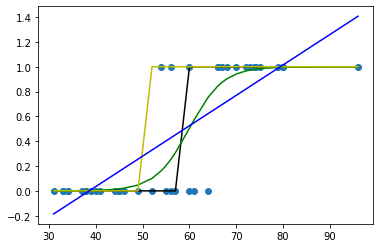

In [15]:
linear_vs_logistic_test(single_grade_df)

Confusion matrix:
[[10  0]
 [ 0 10]]
[[10  0]
 [ 0 10]]
		log	line
Accuracy:	1.0	1.0
Recall:  	1.0	1.0
Precision:	1.0	1.0
Error:   	0.0	0.0


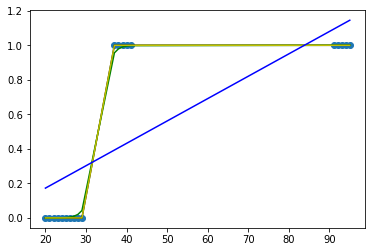

In [14]:
linear_vs_logistic_test(linear_vs_logistic_df)

### Faced problems

On big range dataset that is problem for Linear regression to tune the threshold and cast prediction and smooth probability despite the Logistic regression build in instruments and probabilistic curve nature

### Conclusions

Linear regression is suitable for predicting output that is continuous value, such as predicting the price of a property. Its prediction output can be any real number, range from negative infinity to infinity. The regression line is a straight line.

Whereas logistic regression is for classification problems, which predicts a probability range between 0 to 1. For example, predict whether a customer will make a purchase or not. The regression line is a sigmoid curve.